In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
from sklearn.datasets import load_iris
import pandas as pd

# Data Understading

In [2]:
df_rt1 = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')

In [3]:
df_rt1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [4]:
df_rt2 = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='iso8859_1')

In [5]:
# Merges the two Rotten Tomatoes dataframes on their shared column: 'id'
df_rt = df_rt1.merge(df_rt2, how='inner', on='id')

In [6]:
import string
df_rt['box_office'] = df_rt['box_office'].str.replace('[{}]'.format(string.punctuation), '')
# Removes the commas from the box office column

In [7]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: float(x))
# Changes the box office column from strings to floats

In [8]:
df_rt['runtime'] = df_rt['runtime'].str.strip('minutes')
# Strips the 'minutes' from the runtime column so that we can convert to an int 

In [9]:
df_rt['theater_date'] = pd.to_datetime(df_rt['theater_date'], )
# Changes release date from string to datetime 

In [10]:
df_rt.dropna(subset=['rating_y'], inplace=True)
# drops null values in the rating column

In [11]:
df_rt['rating_y'][0:20]

0       3/5
6         C
7       2/5
11       B-
12      2/4
13        B
14      3/4
15      3/5
16      4/5
17        B
18      2/4
19      4/4
20     6/10
21      1/4
22        8
23      2/5
24    2.5/4
25     4/10
27    2.5/4
29    2.0/5
Name: rating_y, dtype: object

Based on the output above, the rating column is a mess. Some of the ratings are out of 5, some are out of 10, some are our of 4 and some are letter grades. If we want to use this column, we need to figure out a way to standardize it. 

In [12]:
ratings = list(df_rt['rating_y'].value_counts().index[0:])
len(ratings)
# creates a list of all unique ratings

186

In [13]:
def standardize(rating):
    if rating.endswith('5') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-2:])) * 100
    elif rating.endswith('5') and '/' in rating:
        return (float(rating[0]) / float(rating[-1])) * 100
    elif rating.endswith('10') and '/' in rating and len(rating) < 5:
        return (float(rating[0]) / float(rating[-2:])) * 100
    elif rating.endswith('10') and '/' in rating and len(rating) == 5:
        return (float(rating[0:2]) / float(rating[-2:])) * 100
    elif rating.endswith('4') and '/' in rating and '.' in rating:
        return (float(rating[0:3]) / float(rating[-1])) * 100
    elif rating.endswith('5') and '/' in rating:
        return (float(rating[0]) / float(rating[-1])) * 100
    elif rating == 'A+':
        return 98
    elif rating == 'A':
        return 95
    elif rating == 'A-':
        return 92
    elif rating == 'B+':
        return 88
    elif rating == 'B':
        return 85
    elif rating == 'B-':
        return 82
    elif rating == 'C+':
        return 78
    elif rating == 'C':
        return 75
    elif rating == 'C-':
        return 72
    elif rating == 'D+': 
        return 68
    elif rating == 'D':
        return 65
    elif rating == 'D-':
        return 62
        

In [14]:
standardize('10.0/10')

100.0

The function above takes in a rating and returns an integer from 0 to 100. Because the majority of data points in the ratings_y column are either out of 5, 10, or in letter grade format this function will give us standardized ratings for a majority of the entries. 

In [15]:
standardized_list = []
for rating in ratings:
    new_rating = standardize(rating)
    standardized_list.append(new_rating)

In [16]:
standardized_list

[60.0,
 80.0,
 None,
 40.0,
 None,
 62.5,
 87.5,
 70.0,
 100.0,
 85,
 20.0,
 37.5,
 None,
 50.0,
 88,
 None,
 82,
 75,
 78,
 90.0,
 70.0,
 92,
 80.0,
 72,
 60.0,
 30.0,
 95,
 50.0,
 65,
 90.0,
 40.0,
 68,
 0.0,
 None,
 30.0,
 None,
 None,
 None,
 None,
 12.5,
 62,
 None,
 98,
 20.0,
 75.0,
 10.0,
 None,
 85.0,
 65.0,
 None,
 None,
 None,
 10.0,
 55.00000000000001,
 75.0,
 45.0,
 None,
 95.0,
 None,
 40.0,
 60.0,
 100.0,
 None,
 None,
 None,
 100.0,
 None,
 None,
 None,
 None,
 80.0,
 60.0,
 None,
 71.0,
 None,
 50.0,
 None,
 25.0,
 None,
 None,
 82.0,
 None,
 59.00000000000001,
 110.00000000000001,
 80.0,
 68.0,
 79.0,
 0.0,
 72.0,
 35.0,
 74.0,
 50.0,
 None,
 76.0,
 None,
 15.0,
 None,
 92.0,
 84.00000000000001,
 77.0,
 None,
 25.0,
 89.0,
 38.0,
 81.0,
 48.0,
 83.0,
 76.0,
 72.0,
 69.0,
 None,
 88.00000000000001,
 None,
 49.00000000000001,
 None,
 None,
 None,
 None,
 86.0,
 65.99999999999999,
 90.0,
 86.99999999999999,
 None,
 57.99999999999999,
 70.0,
 None,
 42.00000000000001,
 78

Cool, based on the above it looks like the function worked. There are some other review types that didn't fit into the rules of the function, but the majority of reviews fall into these conventions. Let's apply it to the dataset!

In [17]:
df_rt['rating_y'] = df_rt['rating_y'].apply(standardize)

In [18]:
df_rt.dropna(subset=['rating_y'], inplace=True)

In [19]:
df_rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,A distinctly gallows take on contemporary fina...,60.0,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,"Quickly grows repetitive and tiresome, meander...",75.0,rotten,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,Cronenberg is not a director to be daunted by ...,40.0,rotten,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,"While not one of Cronenberg's stronger films, ...",82.0,fresh,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
13,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,The anger over the injustice of the financial ...,85.0,fresh,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54424,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,Dawdles and drags when it should pop; it doesn...,30.0,rotten,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54428,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,20.0,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,40.0,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,50.0,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Rotten tomatoes uses a "Tomatometer" to rate movies. If a critic likes the movie, they designate "fresh," if they don't enjoy it they desginate it "rotten" The tomatometer represents the percentage of fresh designations. Using the fresh column from the dataset, we can create a tomatometer for each movie. 

In [20]:
def fresh(rating):
    if rating == 'fresh':
        return 1
    elif rating == 'rotten':
        return 0 

This function returns a rating of 1 if the review is fresh and 0 if it is rotten. We can then use this to come up with  tomatometer for each movie - it will be the mean of all rotten/fresh values for a speficied movie 

In [21]:
df_rt['fresh'] = df_rt['fresh'].apply(fresh)
# applies the function to the fresh column

In [22]:
df_rt['currency'].value_counts()
# This shows us that all of the currency is in dollars so we don't have to worry about different units 

$    19471
Name: currency, dtype: int64

In [23]:
df_rt['rating_y'] = df_rt.groupby('id')['rating_y'].transform(
    lambda grp: np.mean(grp)
)
df_rt['fresh'] = df_rt.groupby('id')['fresh'].transform(
    lambda grp: np.mean(grp)
)

In [24]:
df_rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,A distinctly gallows take on contemporary fina...,65.938889,0.688889,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
6,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,"Quickly grows repetitive and tiresome, meander...",65.938889,0.688889,Eric D. Snider,0,EricDSnider.com,"July 17, 2013"
7,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,Cronenberg is not a director to be daunted by ...,65.938889,0.688889,Matt Kelemen,0,Las Vegas CityLife,"April 21, 2013"
11,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,"While not one of Cronenberg's stronger films, ...",65.938889,0.688889,Emanuel Levy,0,EmanuelLevy.Com,"February 3, 2013"
13,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108,Entertainment One,The anger over the injustice of the financial ...,65.938889,0.688889,Robert Roten,0,Laramie Movie Scope,"January 7, 2013"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54424,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,Dawdles and drags when it should pop; it doesn...,59.520833,0.458333,Manohla Dargis,1,Los Angeles Times,"September 26, 2002"
54428,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,59.520833,0.458333,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,59.520833,0.458333,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,2001-09-27,"Feb 11, 2003",NaN,NaN,94,Columbia Pictures,NaN,59.520833,0.458333,Christopher Null,0,Filmcritic.com,"September 7, 2003"


The above code first groups the data by indivual movie ('using the 'id' column) and then replaces the individual 'rating' the mean rating for that movie. The same process is repeated for the fresh column. Looking at the df above, we can now see that all values in the "fresh" and "rating" columns are the same for each individual movie (movies with the same value in the 'id' column) 

In [25]:
df_rt = df_rt.drop_duplicates(subset='id')
# This code drops duplicates in the 'id' column so now we only have one row for each movie 

Ideally, if the standardized rating function worked well, the 'fresh' column and 'rating_y' column will be correlated -- let's double check:

In [26]:
np.corrcoef(df_rt['rating_y'], df_rt['fresh'])[1][0]

0.8238504128100249

That's a pretty strong correlation! 

# Business Understanding

Let's use our two rating columns to see if there is any correlation between positive ratings and high box office earnings 

In [27]:
df_rt = df_rt.dropna(subset=['box_office'])
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: x/1000000)
# Drops NA values in the box office column and then converts from dollars to $mm so it is easier to digest

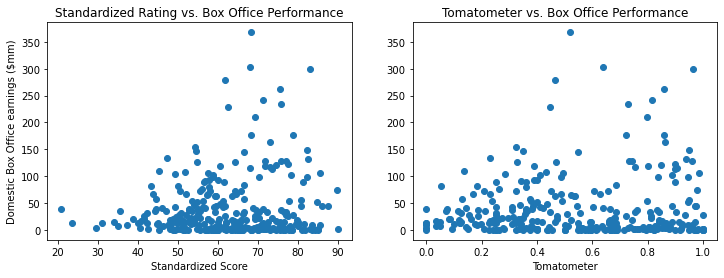

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
x1 = df_rt['rating_y']
x2 = df_rt['fresh']
y = df_rt['box_office']
ax1.scatter(x1,y);
ax2.scatter(x2,y);

ax1.set_title('Standardized Rating vs. Box Office Performance');
ax1.set_xlabel('Standardized Score');
ax1.set_ylabel('Domestic Box Office earnings ($mm)');

ax2.set_title('Tomatometer vs. Box Office Performance');
ax2.set_xlabel('Tomatometer');
ax1.set_ylabel('Domestic Box Office earnings ($mm)');

It doesn't look like there is necessarily a strong relationship between ratings and box office performance but let's double check the correlation to be sure:

In [29]:
rating_correlation = round(np.corrcoef(df_rt['rating_y'], df_rt['box_office'])[1][0],3)
tomatometer_correlation = round(np.corrcoef(df_rt['fresh'], df_rt['box_office'])[1][0],3)

print("The correlation between standardized rating and box office revenue is {}".format(rating_correlation))
print("The correlation between tomatometer and box office revenue is {}".format(tomatometer_correlation))

The correlation between standardized rating and box office revenue is 0.102
The correlation between tomatometer and box office revenue is 0.066


# Random Scratch Work (Not for Working Notebook)

In [30]:
df_rt.groupby('writer').mean()['rating_y'].sort_values(ascending=False)[0:20]

writer
Ji Feng                                            90.000000
Ethan Coen|Joel Coen                               89.672535
Michel Hazanavicius                                87.633562
Sofia Coppola                                      85.977099
Jack Rosenthal|Karey Kirkpatrick                   85.614754
Phyllis Nagy                                       85.426357
Ciro Guerra|Jacques Toulemonde Vidal               85.030769
Martin McDonagh                                    84.698324
Louis Malle                                        84.400000
Tim Burton|Caroline Thompson|Michael McDowell      83.562500
Paul Laverty                                       83.489796
Danis Tanovic                                      83.020000
John Logan|Robert Wade|Neal Purvis                 83.003049
Judd Apatow                                        82.319672
Bob Nelson                                         81.434109
Brian Helgeland                                    81.158879
Josh Mond        

In [31]:
df_rt.groupby('rating_x').mean()

,id,box_office,rating_y,fresh,top_critic
rating_x,,,,,
G,1309.000000,22.845798,64.630083,0.572571,0.142857
NR,1154.071429,0.662835,67.586704,0.746644,0.285714
PG,1051.688889,50.457342,61.137371,0.530203,0.066667
PG-13,1085.168224,56.030564,59.625966,0.456999,0.000000
R,942.206349,25.543678,65.824006,0.613870,0.015873


In [32]:
df_rt['box_office'] = df_rt['box_office'].apply(lambda x: x/1000000)

Text(0.5, 1.0, 'Movie Box Office Earnings versus Standardized Rating')

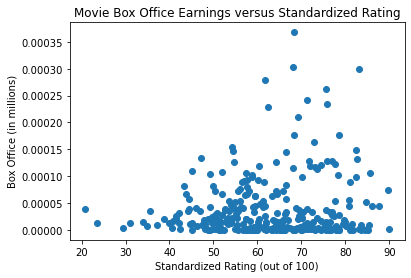

In [33]:
fig, ax = plt.subplots()
x = df_rt['rating_y']
y = df_rt['box_office']
ax.scatter(x,y);
ax.set_xlabel('Standardized Rating (out of 100)')
ax.set_ylabel('Box Office (in millions)')
ax.set_title('Movie Box Office Earnings versus Standardized Rating')

In [34]:
df_rt['fresh'] = df_rt['fresh'].apply(lambda x: round(x,2))
df_rt['rating_y'] = df_rt['rating_y'].apply(lambda x: round(x,2))

In [35]:
df_rt

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,6.000000e-07,108,Entertainment One,A distinctly gallows take on contemporary fina...,65.94,0.69,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
318,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,2002-01-11,"Jun 18, 2002",$,4.103292e-05,82,Paramount Pictures,"It won't stick with you forever, but you will ...",56.72,0.42,NaN,0,Film4,"August 12, 2008"
426,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,2006-04-27,"Oct 2, 2007",$,2.241140e-07,123,Sony Pictures Classics,"Subtle and understated, a meditation on morali...",70.12,0.61,Jeff Simon,0,Buffalo News,"April 9, 2018"
521,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,2010-06-30,"Nov 9, 2010",$,1.349040e-07,117,NaN,A captivating film... [Full review in Spanish],59.97,0.26,Laura Hiros,0,NaN,"March 22, 2018"
726,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,2013-12-20,"Mar 18, 2014",$,9.916561e-05,129,Sony Pictures,The movie is great. It is interesting without ...,82.34,0.95,Debbie Baldwin,0,Ladue News,"November 2, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53567,1976,"Embrace of the Serpent features the encounter,...",NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,2016-02-17,"Jun 21, 2016",$,1.320005e-06,123,Buffalo Films,The journey is definitely the destination in E...,85.03,1.00,Lisa Jensen,0,Good Times Santa Cruz,"September 11, 2017"
53718,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,2005-09-30,"Dec 20, 2005",$,2.533593e-05,119,Universal Pictures,A lovely example of TV sci-fi doing what it do...,77.45,0.81,Tim Brayton,0,Alternate Ending,"September 6, 2017"
53887,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,2012-10-05,"Nov 20, 2012",$,1.416189e-06,129,Eros Entertainment,A capable supporting cast and a fun cameo from...,60.00,1.00,Anil Sinanan,1,Time Out,"October 23, 2017"
53891,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,2002-08-30,"Oct 7, 2003",$,7.943060e-07,97,NaN,...dourly delightful.,83.90,0.98,Josh Larsen,0,LarsenOnFilm,"May 19, 2016"


In [36]:
df_copy = df_rt

In [37]:
df_copy.dropna(subset=['runtime'], inplace=True)

In [38]:
df_copy['runtime'] = df_copy['runtime'].apply(lambda x: int(x))

Text(0.5, 1.0, 'Movie Box Office Earnings versus Run Time')

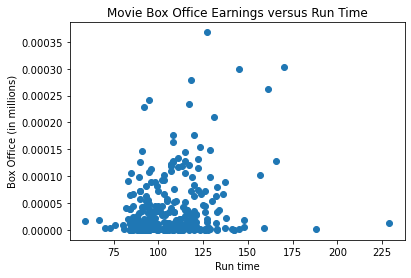

In [39]:
fig, ax = plt.subplots()
x = df_copy['runtime']
y = df_copy['box_office']
ax.scatter(x,y);
ax.set_xlabel('Run time')
ax.set_ylabel('Box Office (in millions)')
ax.set_title('Movie Box Office Earnings versus Run Time')

In [40]:
df_rt.corr()

,id,box_office,runtime,rating_y,fresh,top_critic
id,1.000000,0.053104,0.020323,0.128640,0.112822,0.002975
box_office,0.053104,1.000000,0.220339,0.105482,0.068560,0.008563
runtime,0.020323,0.220339,1.000000,0.259560,0.213691,0.030781
rating_y,0.128640,0.105482,0.259560,1.000000,0.928901,-0.000839
fresh,0.112822,0.068560,0.213691,0.928901,1.000000,0.068893
top_critic,0.002975,0.008563,0.030781,-0.000839,0.068893,1.000000


In [41]:
genres = list(df_rt['genre'].value_counts().index[0:88])

In [42]:
def split_genres(genre):
    return genre.split('|')[0]

split_genres(genres[10])

df_rt['genre'] = df_rt['genre'].apply(split_genres)

In [43]:
df_rt[df_rt['genre'] == 'Classics']

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
46239,1744,Director Ron Maxwell and producer Ted Turner r...,PG-13,Classics,NaN,NaN,2003-02-21,"Jul 15, 2003",$,0.000013,229,Warner Bros. Pictures,Succumbs to turgidity. And...intentionally or ...,49.64,0.12,Peter Canavese,0,Groucho Reviews,"May 30, 2011"


In [44]:
df_rt_genresub = df_rt[df_rt['genre'].isin(["Action and Adventure", "Animation", "Art House and International", "Comedy", "Documentary", "Drama", "Horror"])]
median_genre_box_office = df_rt_genresub.groupby('genre').median()['box_office']
y = list(median_genre_box_office[0:7])
x = list(median_genre_box_office.index[0:7])

[Text(0, 0, 'Action and Adventure'),
 Text(1, 0, 'Animation'),
 Text(2, 0, 'Art House and International'),
 Text(3, 0, 'Comedy'),
 Text(4, 0, 'Documentary'),
 Text(5, 0, 'Drama'),
 Text(6, 0, 'Horror')]

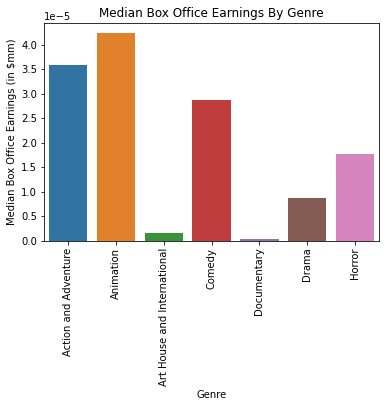

In [45]:
ax = sns.barplot(x=x, y=y)
ax.set_xlabel("Genre")
ax.set_ylabel("Median Box Office Earnings (in $mm)")
ax.set_title("Median Box Office Earnings By Genre")
ax.set_xticklabels(x, rotation=90)

Text(0.5, 1.0, 'Box Office Earnings By Rating')

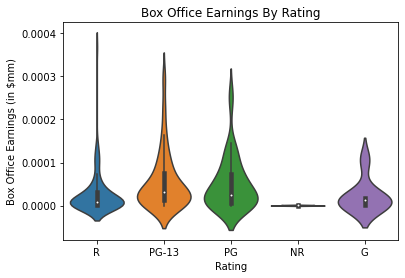

In [46]:
ax = sns.violinplot(x="rating_x", y="box_office", data=df_rt, scale='width');
ax.set_xlabel("Rating")
ax.set_ylabel("Box Office Earnings (in $mm)")
ax.set_title("Box Office Earnings By Rating")